## Step-by-step explanation on the centrifugal compressor preliminary design tool

#### In this explanation, the **High-Pressure Compressor System** of the hydrogen Claude-cyle liquefier from the paper is taken as an example.  

1. First step is to determine the pressure ratio of the compressor. If the pressure ratio is too high for one compressor, then multiple compressors in series should be considered. You can determine this using the tool through trial and error.

In [1]:
P_suc    = 7.4015  #bar # Fluid pressure entering the compression system
P_dis    = 29.803  #bar # Desired fluid pressure exiting the compression system

n_comp   = 3            # Number of compressor units in series

R        = (P_dis/P_suc)**(1/n_comp)  # Pressure ratio (Equation S.2)

print("Pressure Ratio: ",round(R,3))

Pressure Ratio:  1.591


2. Next is creating a compressor object for the first compressor in the series using the "compressor" class from the compressor.py source code:

In [2]:
import compressor

class Format:
    end = '\033[0m'
    underline = '\033[4m'

fluid   = "REFPROP::HYDROGEN" # The working fluid will be hydrogen and its properties will be taken from REFPROP

# First high-pressure compressor
T_in    = 293.803 #K  # Inlet temperature
P_in    = 7.4015 #bar # Inlet pressure
P_out   = R*P_in #bar # Outlet pressure is determine using PR from step 1

m       = round(51498.831/3600,4) #kg/s # Mass-flow

HPC1 = compressor.Compressor(fluid, T_in, P_in, P_out, m) # HPC1 is now a "compressor" object

In [3]:
HPC1.initialSpec() # This function prints out the initially known parameters of the compressor

RADIAL COMPRESSOR INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 14.3052

Inlet Condition
P [bar]     =  7.402
T [Kelvin]  =  293.8
H [kJ/kg]   =  3872.32
S [kJ/kg.K] =  44.958


Isentropic Outlet Condition
P [bar]     =  11.775
T [Kelvin]  =  335.76
H [kJ/kg]   =  4477.523
S [kJ/kg.K] =  44.958


Δh_is [kJ/kg]  =  605.203
Power_is [kW]  = 8657.556


3. We then impose a constraint on the impeller tip-speed velocity, as a design constraint, to determine the minimum number of compression stages are required by your compressor. In this case, we restrict maximum tip-speed velocity to 500 m/s.

In [4]:
# Design constraint
u2_max  = 500  #m/s # Maximum tip speed velocity

HPC1.noOfStages(u2_max) # This function gives you the required minimum and maximum number of stages of your compressor.

# The minimum number of stages required should not exceed the compressors design limitations (Table 3)
# If the minimum stages required exceeds the limitations, then more units should be added to the series (back to Step 1)

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  112.5
Min. number of stage =  5
Max. number of stage =  7


In [5]:
HPC1.rotationalSpeedRange() # This function gives you the minimum and maximum rotational speed of the compressor based on
# optimum specific speed range of centrifugal compressors (0.4 < omega_s < 1.0)

Minimum & Maximum Rotational Speed
Min. RPM =  4577.779
Max. RPM =  12776.73


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-1.0


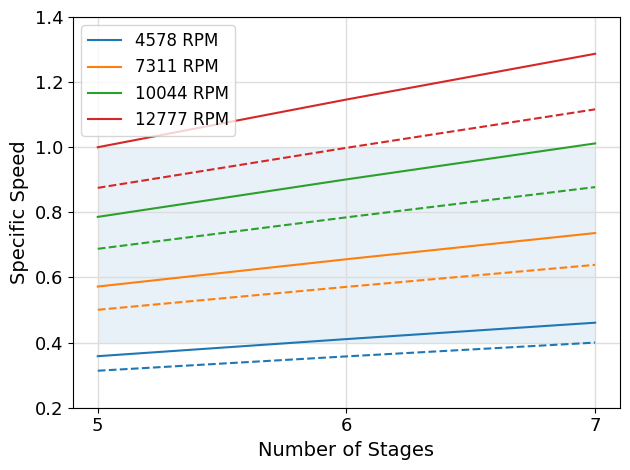

In [6]:
HPC1.nzSelectionPlot() # This function creates the n-z selection plot based on the previous results

4. After you get the n-z plot, you need to make a selection for the combination of rotational speed (RPM) and number of stages of the compressor. The pair values should lie in the blue shaded area of the plot. The best combination should give you a high stage efficiency and stage design parameters that are within or not too far (10%) from the parameter constraints (recommended values for optimum design - **Table 4**).

In [7]:
# Check the results of the stage calculations using the following function.

HPC1.stagesCalculation(8000,6,True) # 8000 is the selected RPM, while 6 is the selected number of stages; 
# the "True" value turn on the warnings if there are stage parameters that are not meeting the parameter constraints

Stage 1
Delta enthalpy [kJ/kg]:118.81
Compression ratio:1.09
Power [kW]:1699.56
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 84684.3,
 'Rotor outlet pressure [bar]': 7.87,
 'Rotor outlet temperature [℃]': 26.83,
 'Diffuser outlet pressure [bar]': 8.03,
 'Diffuser outlet temperature [℃]': 28.93,
 'Polytropic efficiency [%]': 85.05,
 'Isentropic efficiency [%]': 84.9}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.58,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 63.88,
 'Rotor outlet diameter [cm]': 110.06,
 'Diffuser outlet diameter [cm]': 176.49,
 'Blade height at rotor inlet  [cm]': 12.68,
 'Blade height at rotor outlet  [cm]': 7.7}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 115.3,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 115.3,
                      'Absolute tangential rotor outlet': 257.7,
                      'Absolute meridional rotor ou

Stage 6
Delta enthalpy [kJ/kg]:123.6
Compression ratio:1.08
Power [kW]:1768.17
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 65529.37,
 'Rotor outlet pressure [bar]': 11.53,
 'Rotor outlet temperature [℃]': 68.51,
 'Diffuser outlet pressure [bar]': 11.78,
 'Diffuser outlet temperature [℃]': 71.03,
 'Polytropic efficiency [%]': 83.43,
 'Isentropic efficiency [%]': 83.3}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.565,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 61.29,
 'Rotor outlet diameter [cm]': 108.47,
 'Diffuser outlet diameter [cm]': 172.84,
 'Blade height at rotor inlet  [cm]': 11.66,
 'Blade height at rotor outlet  [cm]': 6.14}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 100.1,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 100.1,
                      'Absolute tangential rotor outlet': 266.5,
                      'Absolute meridional roto

5. Once you are satisfied with the stage calculations results, you can use below function to print out a summary of your centrifugal compressor:

In [8]:
HPC1.compDictionary()

RADIAL COMPRESSOR FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 14.3052,
 'Compressor type': 'Radial compressor',
 'Rotational speed [RPM]': 8000,
 'Number of stages': 6,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 7.4,
 'Inlet temperature [C]': 20.65,
 'Inlet volumetric [m3/h]': 84684.3,
 'Delta enthalpy [kJ/kg]': 726.86,
 'Compression ratio': 1.59,
 'Compressor power [kW]': 10397.9,
 'Comp. Isentropic eff. [%]': 83.26,
 'Comp. Polytropic eff. [%]': 84.32}


6. Now, repeat the same process for the second and third compressors.

In [9]:
# Second high-pressure compressor
T_in    = 298.150 #K # Outlet temperature of the first compressor's aftercooler
P_in    = 11.7747 #bar
P_out   = R*P_in #bar

HPC2 = compressor.Compressor(fluid, T_in, P_in, P_out, m)

In [10]:
HPC2.initialSpec()

RADIAL COMPRESSOR INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 14.3052

Inlet Condition
P [bar]     =  11.775
T [Kelvin]  =  298.15
H [kJ/kg]   =  3936.454
S [kJ/kg.K] =  43.249


Isentropic Outlet Condition
P [bar]     =  18.733
T [Kelvin]  =  340.69
H [kJ/kg]   =  4552.467
S [kJ/kg.K] =  43.249


Δh_is [kJ/kg]  =  616.013
Power_is [kW]  = 8812.188


In [11]:
#design constraint
u2_max  = 500  #m/s

HPC2.noOfStages(u2_max)

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  112.5
Min. number of stage =  5
Max. number of stage =  7


In [12]:
HPC2.rotationalSpeedRange()

Minimum & Maximum Rotational Speed
Min. RPM =  5798.487
Max. RPM =  16190.638


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-1.0


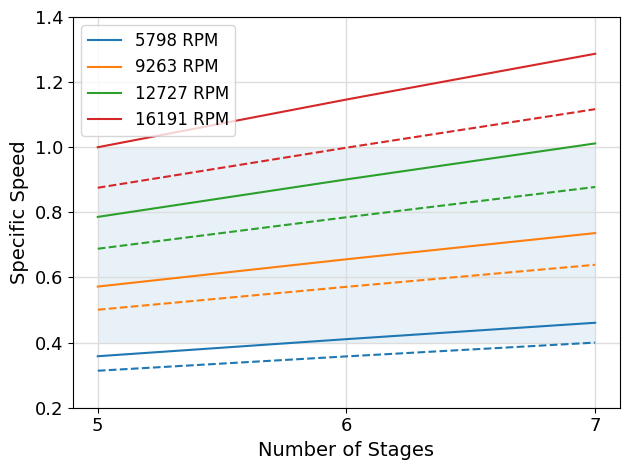

In [13]:
HPC2.nzSelectionPlot()

In [14]:
HPC2.stagesCalculation(9900,6,True)

Stage 1
Delta enthalpy [kJ/kg]:121.21
Compression ratio:1.09
Power [kW]:1734.0
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 54156.06,
 'Rotor outlet pressure [bar]': 12.51,
 'Rotor outlet temperature [℃]': 31.24,
 'Diffuser outlet pressure [bar]': 12.78,
 'Diffuser outlet temperature [℃]': 33.42,
 'Polytropic efficiency [%]': 84.79,
 'Isentropic efficiency [%]': 84.7}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.577,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 51.66,
 'Rotor outlet diameter [cm]': 89.47,
 'Diffuser outlet diameter [cm]': 143.29,
 'Blade height at rotor inlet  [cm]': 10.17,
 'Blade height at rotor outlet  [cm]': 6.03}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 113.5,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 113.5,
                      'Absolute tangential rotor outlet': 261.4,
                      'Absolute meridional rotor

Stage 5
Delta enthalpy [kJ/kg]:125.33
Compression ratio:1.08
Power [kW]:1792.94
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 44045.17,
 'Rotor outlet pressure [bar]': 17.04,
 'Rotor outlet temperature [℃]': 65.07,
 'Diffuser outlet pressure [bar]': 17.41,
 'Diffuser outlet temperature [℃]': 67.6,
 'Polytropic efficiency [%]': 83.44,
 'Isentropic efficiency [%]': 83.3}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.565,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 49.99,
 'Rotor outlet diameter [cm]': 88.45,
 'Diffuser outlet diameter [cm]': 140.93,
 'Blade height at rotor inlet  [cm]': 9.51,
 'Blade height at rotor outlet  [cm]': 5.01}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 101.1,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 101.1,
                      'Absolute tangential rotor outlet': 268.8,
                      'Absolute meridional rotor 

In [15]:
HPC2.compDictionary()

RADIAL COMPRESSOR FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 14.3052,
 'Compressor type': 'Radial compressor',
 'Rotational speed [RPM]': 9900,
 'Number of stages': 6,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 11.77,
 'Inlet temperature [C]': 25.0,
 'Inlet volumetric [m3/h]': 54156.06,
 'Delta enthalpy [kJ/kg]': 742.64,
 'Compression ratio': 1.59,
 'Compressor power [kW]': 10623.67,
 'Comp. Isentropic eff. [%]': 82.95,
 'Comp. Polytropic eff. [%]': 84.02}


In [16]:
# Third high-pressure compressor
T_in    = 298.150 #K # Outlet temperature of the second compressor's aftercooler
P_in    = 18.7320 #bar
P_out   = R*P_in #bar

HPC3 = compressor.Compressor(fluid, T_in, P_in, P_out, m)

In [17]:
HPC3.initialSpec()

RADIAL COMPRESSOR INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 14.3052

Inlet Condition
P [bar]     =  18.732
T [Kelvin]  =  298.15
H [kJ/kg]   =  3939.509
S [kJ/kg.K] =  41.327


Isentropic Outlet Condition
P [bar]     =  29.801
T [Kelvin]  =  340.7
H [kJ/kg]   =  4558.594
S [kJ/kg.K] =  41.327


Δh_is [kJ/kg]  =  619.085
Power_is [kW]  = 8856.136


In [18]:
#design constraint
u2_max  = 500  #m/s

HPC3.noOfStages(u2_max)

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  112.5
Min. number of stage =  6
Max. number of stage =  8


In [19]:
HPC3.rotationalSpeedRange()

Minimum & Maximum Rotational Speed
Min. RPM =  6641.096
Max. RPM =  17841.51


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-1.0


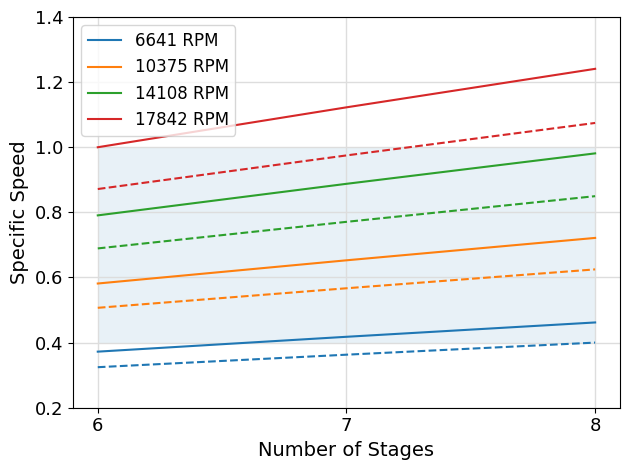

In [20]:
HPC3.nzSelectionPlot()

In [21]:
HPC3.stagesCalculation(12500,6,True)

Stage 1
Delta enthalpy [kJ/kg]:121.82
Compression ratio:1.09
Power [kW]:1742.65
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 34180.68,
 'Rotor outlet pressure [bar]': 19.91,
 'Rotor outlet temperature [℃]': 31.25,
 'Diffuser outlet pressure [bar]': 20.33,
 'Diffuser outlet temperature [℃]': 33.43,
 'Polytropic efficiency [%]': 84.79,
 'Isentropic efficiency [%]': 84.7}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.577,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 41.01,
 'Rotor outlet diameter [cm]': 71.03,
 'Diffuser outlet diameter [cm]': 113.76,
 'Blade height at rotor inlet  [cm]': 8.07,
 'Blade height at rotor outlet  [cm]': 4.78}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 113.7,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 113.7,
                      'Absolute tangential rotor outlet': 262.0,
                      'Absolute meridional rotor

Stage 6
Delta enthalpy [kJ/kg]:127.1
Compression ratio:1.08
Power [kW]:1818.23
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 26521.9,
 'Rotor outlet pressure [bar]': 29.16,
 'Rotor outlet temperature [℃]': 73.73,
 'Diffuser outlet pressure [bar]': 29.8,
 'Diffuser outlet temperature [℃]': 76.35,
 'Polytropic efficiency [%]': 83.07,
 'Isentropic efficiency [%]': 82.9}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.563,
 'Rotor hub diameter ratio': 0.35,
 'Rotor inlet diameter [cm]': 39.41,
 'Rotor outlet diameter [cm]': 70.05,
 'Diffuser outlet diameter [cm]': 111.5,
 'Blade height at rotor inlet  [cm]': 7.44,
 'Blade height at rotor outlet  [cm]': 3.8}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 98.6,
                      'Absolute tangential rotor inlet': 0.0,
                      'Absolute rotor inlet': 98.6,
                      'Absolute tangential rotor outlet': 271.5,
                      'Absolute meridional rotor outlet

In [22]:
HPC3.compDictionary()

RADIAL COMPRESSOR FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 14.3052,
 'Compressor type': 'Radial compressor',
 'Rotational speed [RPM]': 12500,
 'Number of stages': 6,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 18.73,
 'Inlet temperature [C]': 25.0,
 'Inlet volumetric [m3/h]': 34180.68,
 'Delta enthalpy [kJ/kg]': 746.51,
 'Compression ratio': 1.59,
 'Compressor power [kW]': 10678.94,
 'Comp. Isentropic eff. [%]': 82.93,
 'Comp. Polytropic eff. [%]': 84.0}


7. The number of compressor units in series and their calculated isentropic efficiencies from this preliminary design are used to refine the process model in ASPEN HYSYS. The selected number of compression stages and rotational speed of the compressor are used to refine APEA cost estimation.